# **Day-11 | House price prediction using Linear Regression-SingleVariable**

### *Import Libraries*

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

### *Load Dataset from Local Directory*

In [2]:
# from google.colab import files
# uploaded = files.upload()

### *Load Dataset*

In [10]:
dataset = pd.read_csv('dataset.csv')
dataset.head(10)

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
5,14115,143000
6,10084,307000
7,10382,200000
8,6120,129900
9,7420,118000


### *Load Summarize*

In [11]:
import plotly.express as px
import plotly.io as pio

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 
# pio.renderers.default = "notebook_connected" 

pio.renderers.default = "browser"

fig = px.line(x=x, y=y, title="Interactive Line Plot")
fig.update_layout(xaxis_title="X-axis", yaxis_title="Y-axis")
fig.show()

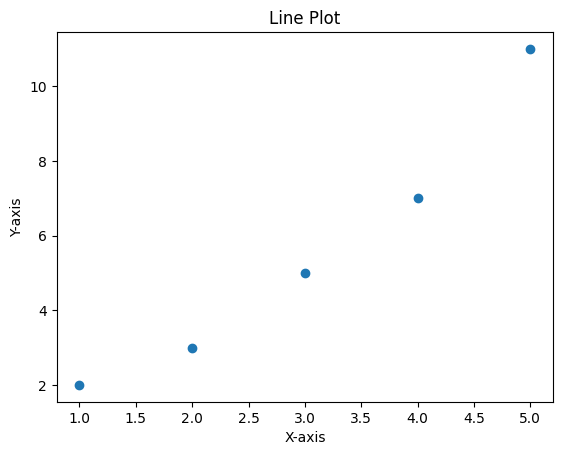

In [18]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.scatter(x, y)
plt.title("Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [27]:
print("Shape of the dataset:", dataset.shape)
print()
print("Data types of each column:\n", dataset.dtypes)
print()
print('Detailed Info', dataset.info())
print()
print(dataset.head(5))

Shape of the dataset: (1460, 2)

Data types of each column:
 area     int64
price    int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    1460 non-null   int64
 1   price   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
Detailed Info None

    area   price
0   8450  208500
1   9600  181500
2  11250  223500
3   9550  140000
4  14260  250000


### *Visualize Dataset*

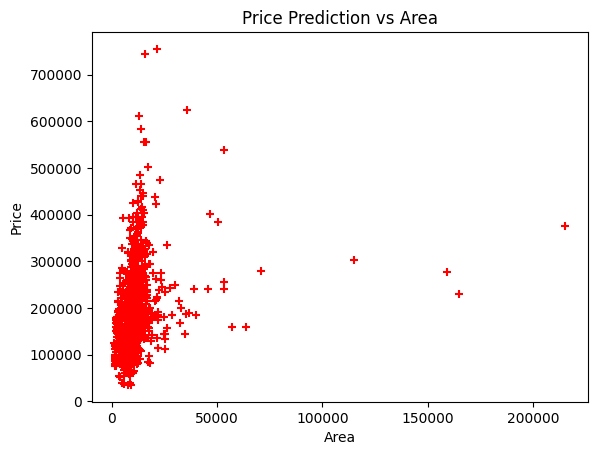

In [13]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Prediction vs Area')
plt.scatter(dataset.area,dataset.price,color='red',marker='+')
plt.show()

### *Segregate Dataset into Input X & Output Y*

In [37]:
# X = dataset.drop('price',axis='columns')
X = dataset[['area']] 
X

,area
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [38]:
Y = dataset.price
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: price, Length: 1460, dtype: int64

### *Training Dataset using Linear Regression*

In [39]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### *Predicted Price for Land sq.Feet of custom values*

In [ ]:
x=8450
#LandAreainSqFt=[[x]]
LandAreainSqFt = pd.DataFrame([[x]], columns=['area'])  # Create a DataFrame with the same column name
PredictedmodelResult = model.predict(LandAreainSqFt)

print(PredictedmodelResult)

[176580.91488881]


### Let's check is our model is Right ?
### Theory Calculation
### Y = m * X + b (m is coefficient and b is intercept)

In [45]:
x=8450
LandAreainSqFt=[[x]]
PredictedmodelResult = model.predict(LandAreainSqFt)
print(PredictedmodelResult)

[176580.91488881]


c:\Users\DeepakParihar\Desktop\1_GenAI\Python-GenAI\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



*Coefficient - m*

In [46]:
m=model.coef_
print(m)

[2.09997195]


*Intercept - b*

In [47]:
b=model.intercept_
print(b)

158836.1518968766


### Y=mx+b
*x is Independant variable - Input - area*

In [48]:
y = m*x + b
print("The Price of {0} Square feet Land is: {1}".format(x,y[0]))

The Price of 8450 Square feet Land is: 176580.91488880644


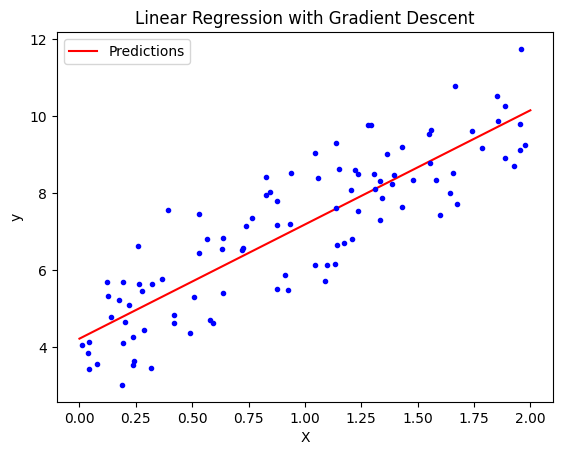

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]


# Gradient Descent function
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta


# Train the model
theta_best = gradient_descent(X_b, y)

# Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta_best)


# Plotting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()